In [71]:
import errno
import json
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.misc
from scipy.ndimage import rotate
from scipy.stats import bernoulli
import helper

%matplotlib inline

In [112]:
# Some useful constants
DRIVING_LOG_FILE = os.getcwd() + os.sep + os.pardir + '/data/driving_log.csv'
IMG_PATH = os.getcwd() + os.sep + os.pardir 

                  image     time  steering
0        data/IMG/1.jpg  75250.0  0.000000
1        data/IMG/2.jpg  75400.0  0.000000
2        data/IMG/3.jpg  75800.0  0.000000
3        data/IMG/4.jpg  76250.0  0.000000
4        data/IMG/5.jpg  76650.0  0.000000
5        data/IMG/6.jpg  77000.0  0.000000
6        data/IMG/7.jpg  77350.0  0.000000
7        data/IMG/8.jpg  77800.0  0.000000
8        data/IMG/9.jpg  78250.0  0.000000
9       data/IMG/10.jpg  78700.0  0.000000
10      data/IMG/11.jpg  79050.0  0.000000
11      data/IMG/12.jpg  79500.0  0.000000
12      data/IMG/13.jpg  79900.0  0.000000
13      data/IMG/14.jpg  80300.0  0.000000
14      data/IMG/15.jpg  80650.0  0.000000
15      data/IMG/16.jpg  81050.0  0.000000
16      data/IMG/17.jpg  81400.0  0.000000
17      data/IMG/18.jpg  81800.0  0.000000
18      data/IMG/19.jpg  82200.0  0.000000
19      data/IMG/20.jpg  82600.0  0.000000
20      data/IMG/21.jpg  82950.0  0.000000
21      data/IMG/22.jpg  83350.0  0.000000
22      dat

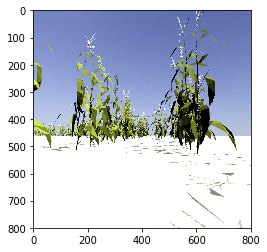

In [106]:
data_frame = pd.read_csv(DRIVING_LOG_FILE, usecols=[0,1,2])
print(data_frame)
img = cv2.imread(IMG_PATH + '1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [40]:
from keras.models import model_from_yaml
from keras.layers import Dense, Flatten, Lambda, Activation, MaxPooling2D
from keras.layers.convolutional import Convolution2D
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf

activation_relu = 'relu'

# Check if this can be moved to the Class
def create_model(hd5Path):
    model = Sequential()

    model.add(Lambda(lambda x: x / 127.5 - 1.0, input_shape=(64, 64, 3)))

    # starts with five convolutional and maxpooling layers
    model.add(Convolution2D(24, 5, 5, border_mode='same', subsample=(2, 2)))
    model.add(Activation(activation_relu))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Convolution2D(36, 5, 5, border_mode='same', subsample=(2, 2)))
    model.add(Activation(activation_relu))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Convolution2D(48, 5, 5, border_mode='same', subsample=(2, 2)))
    model.add(Activation(activation_relu))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Convolution2D(64, 3, 3, border_mode='same', subsample=(1, 1)))
    model.add(Activation(activation_relu))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Convolution2D(64, 3, 3, border_mode='same', subsample=(1, 1)))
    model.add(Activation(activation_relu))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Flatten())

    # Next, five fully connected layers
    model.add(Dense(1164))
    model.add(Activation(activation_relu))

    model.add(Dense(100))
    model.add(Activation(activation_relu))

    model.add(Dense(50))
    model.add(Activation(activation_relu))

    model.add(Dense(10))
    model.add(Activation(activation_relu))

    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')

    model.load_weights(hd5Path)

    return model

In [103]:
# Create model and load weights
MODEL_PATH = os.getcwd() + os.sep + os.pardir
model = create_model(MODEL_PATH + "/trained_models/model_crop.h5")
model._make_predict_function()
graph = tf.get_default_graph()

/Users/karan/.virtualenvs/dlearn/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), strides=(2, 2), padding="same")`
/Users/karan/.virtualenvs/dlearn/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), strides=(2, 2), padding="same")`
/Users/karan/.virtualenvs/dlearn/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), strides=(2, 2), padding="same")`
/Users/karan/.virtualenvs/dlearn/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), strides=(1, 1), padding="same")`
/Users/karan/.virtualenvs/dlearn/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), strides=(1, 1), padding="same")`


In [100]:
onlyfiles = [f for f in os.listdir(IMG_PATH) if os.path.isfile(os.path.join(IMG_PATH,f))]
images = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    images[n] = cv2.imread(os.path.join(IMG_PATH, onlyfiles[n]))

In [119]:
for i in range(len(data_frame)):
    cv_img = cv2.imread(IMG_PATH + "/" + data_frame.image[i])
    img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB) 
    image_array = np.asarray(img)
    image_array = helper.crop(image_array, 0.35, 0.1)
    image_array = helper.resize(image_array, new_dim=(64, 64))
    transformed_image_array = image_array[None, :, :, :]
    actual_steering = data_frame.steering[i]
    with graph.as_default():
        steering_angle = float(model.predict(transformed_image_array, batch_size=1))
    error = np.sqrt(pow(actual_steering - steering_angle, 2))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img,'Predicted Steering Angle: ' + "{0:.3f}".format(steering_angle), (10,700), font, 1, (255,0,0), 2, cv2.LINE_AA)
    cv2.putText(img,'Actual Steering Angle: ' + "{0:.3f}".format(actual_steering), (10,750), font, 1, (0,255,0), 2, cv2.LINE_AA)
    cv2.putText(img,'Error: ' + "{0:.3f}".format(error), (10,790), font, 1, (0,0,255), 2, cv2.LINE_AA)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite('../Video/' + "{}.jpg".format(i), img)